📝 Project: Regression on Diamond Price Prediction
In this project, we analyze a dataset containing various physical and qualitative characteristics of diamonds. The goal is to build a complete machine learning pipeline—from data exploration and preprocessing to model development and evaluation—to predict the price of a diamond based on its measurable features and quality grades.

🎯 Objective
The primary objective is to develop and compare multiple regression models to accurately predict the price of a diamond, leveraging features like carat, cut, color, clarity, and physical dimensions such as depth, table, and dimensions (x, y, z). Accurate price prediction can support jewelers, online retailers, and appraisal professionals in real-time valuation and inventory pricing.

🤖 Models Evaluated
- Linear Regression

- Polynomial Regression

- Support Vector Regression (SVR)

- Random Forest Regressor

- Tuned Random Forest Regressor

- XGBoost Regressor

📊 Evaluation Metrics
Model performance is evaluated using:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

These metrics help assess the accuracy and reliability of predictions.

Outcome
By comparing various models, we aim to:

- Identify the best-performing regression algorithm for diamond price prediction

- Understand the impact of each feature (especially carat, cut, and clarity) on price

- Provide data-driven insights to enhance pricing models for diamonds in retail and appraisal industries

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S7/Reression/diamonds.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data=data.drop('Unnamed: 0',axis=1)

In [5]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

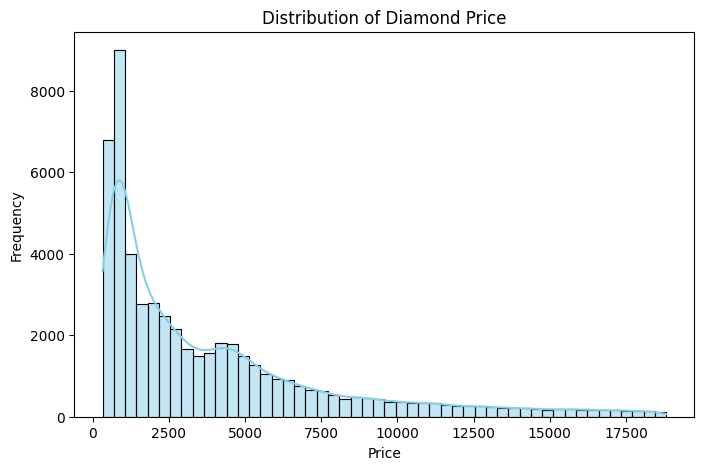

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Diamond Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


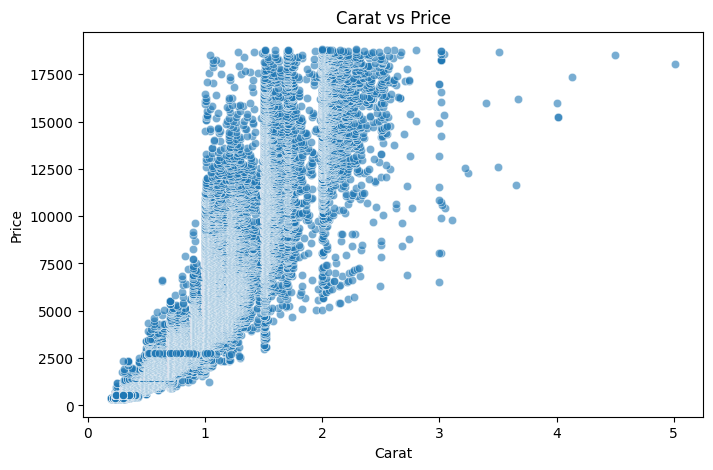

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carat', y='price', data=data, alpha=0.6)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_6179/431487984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=data, palette='Set2')


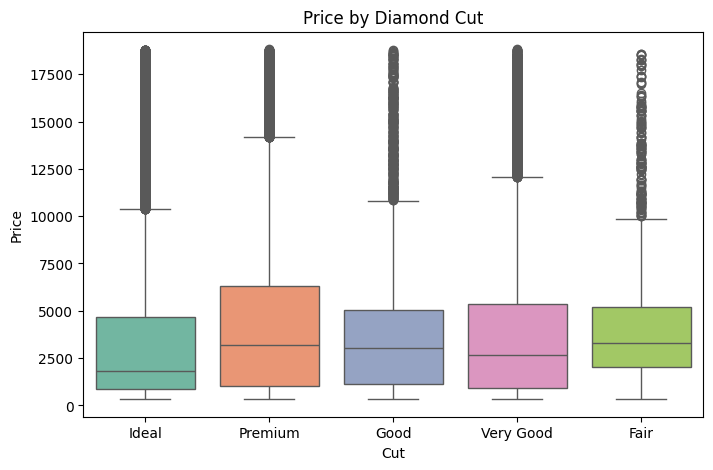

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cut', y='price', data=data, palette='Set2')
plt.title('Price by Diamond Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_6179/2622768203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='color', y='price', data=data, palette='Pastel1')


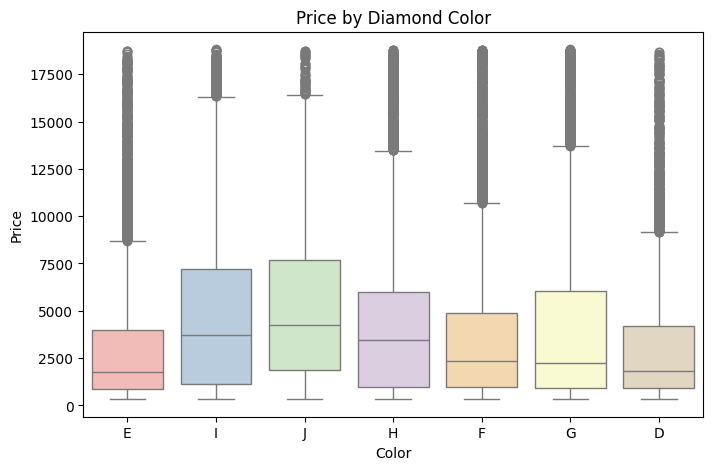

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='color', y='price', data=data, palette='Pastel1')
plt.title('Price by Diamond Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()


/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_6179/146955886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y='price', data=data, palette='Set3')


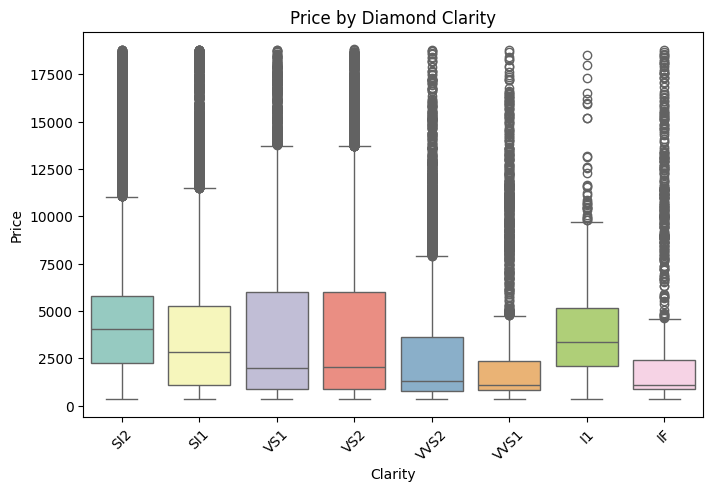

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='clarity', y='price', data=data, palette='Set3')
plt.title('Price by Diamond Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


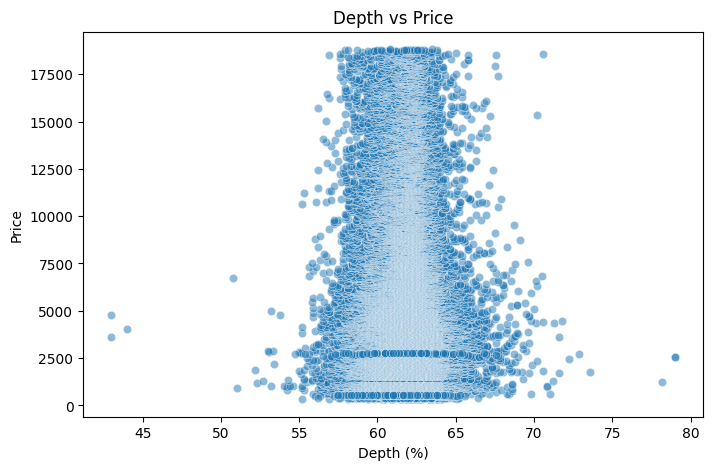

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='depth', y='price', data=data, alpha=0.5)
plt.title('Depth vs Price')
plt.xlabel('Depth (%)')
plt.ylabel('Price')
plt.show()


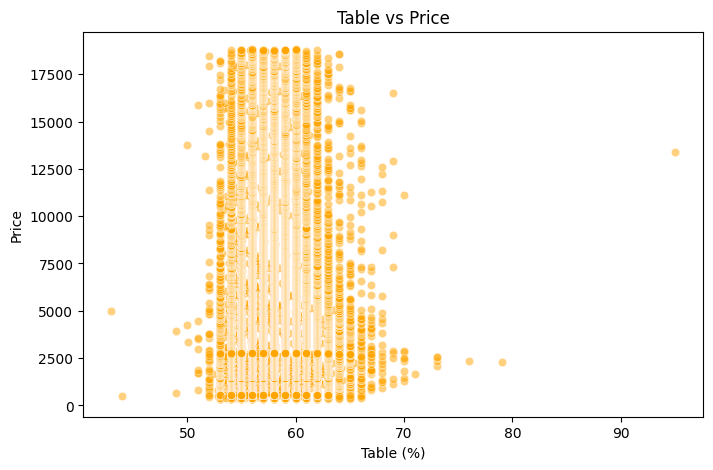

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='table', y='price', data=data, alpha=0.5, color='orange')
plt.title('Table vs Price')
plt.xlabel('Table (%)')
plt.ylabel('Price')
plt.show()


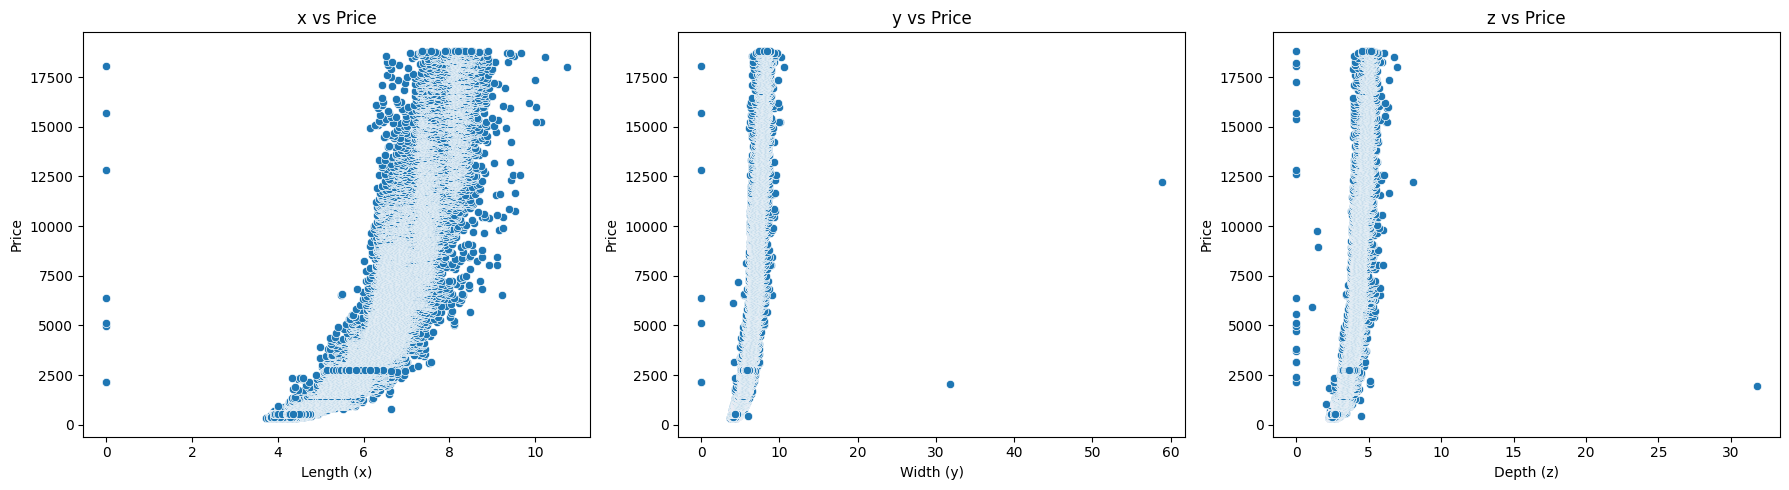

In [14]:
# Length (x), Width (y), Depth (z)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='x', y='price', data=data, ax=axs[0])
axs[0].set_title('x vs Price')
axs[0].set_xlabel('Length (x)')

sns.scatterplot(x='y', y='price', data=data, ax=axs[1])
axs[1].set_title('y vs Price')
axs[1].set_xlabel('Width (y)')

sns.scatterplot(x='z', y='price', data=data, ax=axs[2])
axs[2].set_title('z vs Price')
axs[2].set_xlabel('Depth (z)')

for ax in axs:
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()


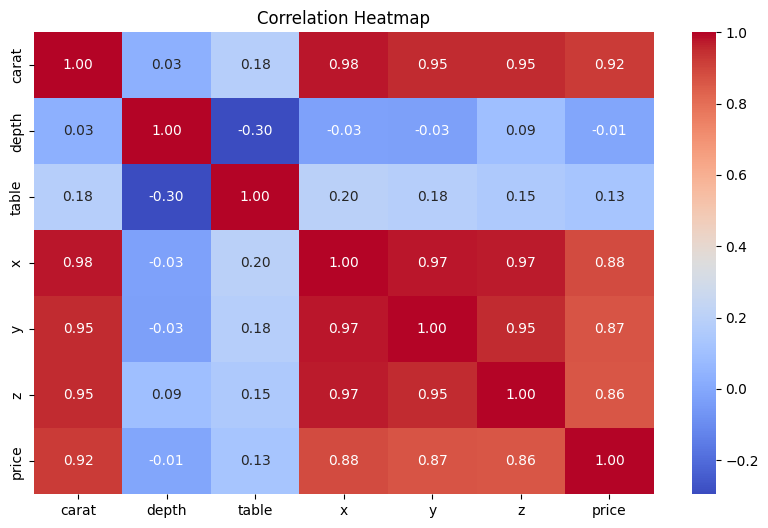

In [15]:
plt.figure(figsize=(10, 6))
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

In [16]:
X = data.drop("price", axis=1)
y = data["price"]

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multilinear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)

print("🔹 Multiple Linear Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_lr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Multiple Linear Regression
MAE: 858.7084697710053
MSE: 1825912.9915253392
RMSE: 1351.2634796831221
🔹 R² Score (Accuracy for Regression): 0.8851397433679637


# Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)

print("\n🔸 Polynomial Regression (Degree=2)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)



🔸 Polynomial Regression (Degree=2)
MAE: 606.8082120715576
MSE: 1054257.7554453544
RMSE: 1026.7705466390016


# SVR

In [22]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)

print("\n🔹 Support Vector Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_svr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Support Vector Regression
MAE: 1346.1484080798225
MSE: 7712146.974330424
RMSE: 2777.0752554315886
🔹 R² Score (Accuracy for Regression): 0.5148623265363947


# RandomForest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)

print("\n🔸 Random Forest Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔸 Random Forest Regression
MAE: 268.0929986537069
MSE: 294165.2816544453
RMSE: 542.3700596958181
🔹 R² Score (Accuracy for Regression): 0.9814953396465848


# XGB Regressor

In [25]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_xgb)
MSE = mean_squared_error(y_test, y_pred_xgb)
RMSE = np.sqrt(MSE)

print("\n🔹 XGBoost Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_xgb)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 XGBoost Regression
MAE: 277.403076171875
MSE: 283130.15625
RMSE: 532.0997615579244
🔹 R² Score (Accuracy for Regression): 0.9821895360946655


In [26]:
import matplotlib.pyplot as plt

# Store error values for each model
model_names = ['Linear', 'Polynomial','SVR', 'Random Forest','XGBoost']

mae_values = [
    mean_absolute_error(y_test, y_pred_lr),      # Linear Regression
    mean_absolute_error(y_test, y_pred_poly),    # Polynomial Regression 
    mean_absolute_error(y_test, y_pred_svr),     # SVR
    mean_absolute_error(y_test, y_pred_rf),      # Random Forest
    mean_absolute_error(y_test, y_pred_xgb)      # XGBoost
]

mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_xgb)
]

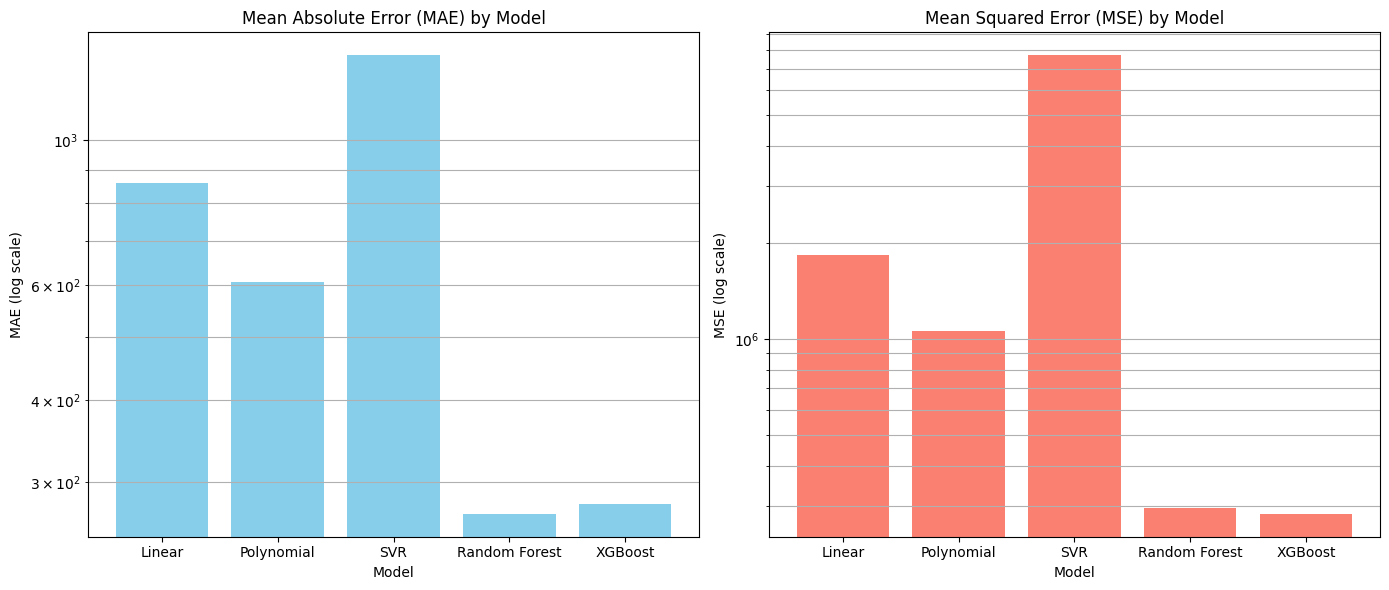

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MAE Plot (log scale)
axs[0].bar(model_names, mae_values, color='skyblue')
axs[0].set_title("Mean Absolute Error (MAE) by Model")
axs[0].set_ylabel("MAE (log scale)")
axs[0].set_xlabel("Model")
axs[0].set_yscale('log')  # ✅ log scale
axs[0].grid(axis='y', which='both')

# MSE Plot (log scale)
axs[1].bar(model_names, mse_values, color='salmon')
axs[1].set_title("Mean Squared Error (MSE) by Model")
axs[1].set_ylabel("MSE (log scale)")
axs[1].set_xlabel("Model")
axs[1].set_yscale('log')  # ✅ log scale
axs[1].grid(axis='y', which='both')

plt.tight_layout()
plt.show()
